In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
with open('lvis_v1_train.json') as f:
    a=json.load(f)


In [17]:
from collections import defaultdict

d=defaultdict(list)
img_area={}
for i in a['images']:
    img_area[i['id']]=i['width']*i['height']

    
for i in a['annotations']:
    d[i['category_id']].append(i['bbox'][2]*i['bbox'][3]/img_area[i['image_id']])


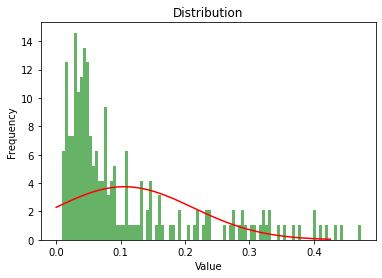

In [37]:
import numpy as np
from scipy.stats import norm
x=np.sqrt(np.array(d[5]))
mu,std=np.mean(x),np.std(x)
x2=np.linspace(0,mu+3*std,100)
y=norm.pdf(x2,mu,std)
plt.hist(x, bins=100, density=True, alpha=0.6, color='g')
plt.plot(x2,y,color='r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution')

plt.show()


In [38]:
p={}
for i in d:
    x=np.sqrt(np.array(d[i]))
    mu,std=np.mean(x),np.std(x)
    p[i]=[mu,std]

with open('area_mean_std2.json','w') as f:
    json.dump(p,f)